In [1]:
#import pandas library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer
%matplotlib inline

In [3]:
#loading dataset
df=pd.read_csv("weather.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [4]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df.isnull().values.any()

True

In [6]:
df.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [7]:
df1 = df.drop(['WindDir9am','WindSpeed9am'], axis=1)

In [8]:
df1.isnull().values.any()

True

In [9]:
df1.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustDir      3
WindGustSpeed    2
WindDir3pm       1
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [10]:
df1['Sunshine'] = df1['Sunshine'].fillna(df1['Sunshine'].mean())
df1['WindGustSpeed'] = df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].mean())

In [11]:
df1.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      3
WindGustSpeed    0
WindDir3pm       1
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## Most frequent label in categorical so that we can replace NA with them.

In [12]:
df1.WindGustDir.mode()

0    NW
dtype: object

In [13]:
df1['WindGustDir'] = df1['WindGustDir'].fillna('NW')

In [14]:
df1.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       1
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [15]:
df1.WindDir3pm.mode()

0     NW
1    WNW
dtype: object

In [16]:
df1['WindDir3pm'] = df1['WindDir3pm'].fillna('NW')

In [17]:
df1.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [18]:
df1.isnull().values.any()

False

In [19]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,NW,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,W,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,NNE,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,W,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,ESE,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,NW,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,WNW,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


## WindGustDir, WindDir3pm, RainToday, RainTomorrow are categorical data we need to convert them into numerical data.

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [21]:
df1['WindGustDir']= le.fit_transform(df1['WindGustDir'])
df1['WindDir3pm']= le.fit_transform(df1['WindDir3pm'])
df1['RainToday']= le.fit_transform(df1['RainToday'])
df1['RainTomorrow']= le.fit_transform(df1['RainTomorrow'])

In [22]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,7,30.0,7,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,1,39.0,13,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,7,85.0,5,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,7,54.0,13,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,10,50.0,2,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,6,76.0,7,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
362,7.1,28.4,0.0,11.6,12.7,3,48.0,6,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
363,12.5,19.9,0.0,8.4,5.3,2,43.0,1,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
364,12.5,26.9,0.0,5.0,7.1,7,46.0,14,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


# ***Training Model***

In [23]:
#feature variables
x=df1.drop(['RainTomorrow'], axis=1)
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,7,30.0,7,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,14.0,26.9,3.6,4.4,9.7,1,39.0,13,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,13.7,23.4,3.6,5.8,3.3,7,85.0,5,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,13.3,15.5,39.8,7.2,9.1,7,54.0,13,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,7.6,16.1,2.8,5.6,10.6,10,50.0,2,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,6,76.0,7,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0
362,7.1,28.4,0.0,11.6,12.7,3,48.0,6,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0
363,12.5,19.9,0.0,8.4,5.3,2,43.0,1,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0
364,12.5,26.9,0.0,5.0,7.1,7,46.0,14,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0


In [24]:
#target variable
y=df1.RainTomorrow
y

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 366, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## First we have to do feature selection for better results, so we 

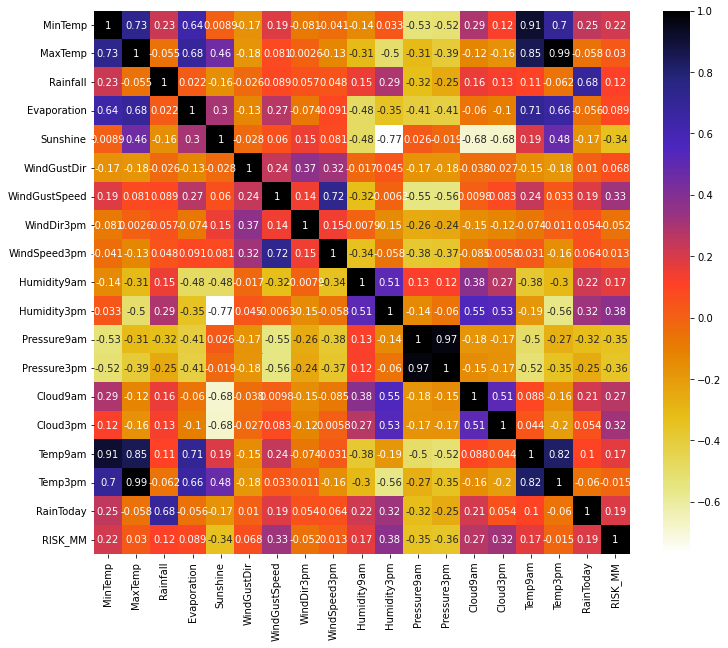

In [26]:
cor = x_train.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r, annot=True)
plt.show()

In [27]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(x_train, 0.75)
corr_features

{'Humidity3pm', 'Pressure3pm', 'Temp3pm', 'Temp9am'}

In [29]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity9am,Pressure9am,Cloud9am,Cloud3pm,RainToday,RISK_MM
247,-0.1,14.2,0.0,1.4,7.0,13,13.0,14,2,81,1032.9,1,2,0,0.0
127,10.8,29.2,0.0,8.4,7.5,0,50.0,1,9,56,1021.6,0,7,0,3.0
230,0.4,15.5,0.0,1.0,4.7,3,13.0,6,9,97,1026.7,5,7,0,0.0
162,7.1,23.4,0.0,3.4,10.2,2,39.0,15,7,72,1021.0,0,1,0,0.0
159,6.9,18.9,0.0,4.2,4.1,2,39.0,9,9,68,1028.2,5,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-1.6,11.5,0.0,2.8,8.9,3,31.0,6,20,82,1024.3,1,1,0,0.0
290,-1.3,11.6,0.0,4.0,10.4,3,30.0,6,17,59,1023.3,0,1,0,0.0
175,2.5,21.2,0.0,2.0,7.9,4,28.0,4,9,82,1023.7,4,4,0,0.0
139,15.1,26.2,0.0,9.0,9.8,4,31.0,5,15,59,1022.1,1,4,0,0.0


# ***ID3***

In [31]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[98,  0],
       [ 0, 12]])

In [32]:
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        12

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



# ***KNN***

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel = KNNmodel.fit(x_train,y_train)
y_pred = KNNmodel.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[97,  1],
       [10,  2]])

In [34]:
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy: 90.0
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        98
           1       0.67      0.17      0.27        12

    accuracy                           0.90       110
   macro avg       0.79      0.58      0.61       110
weighted avg       0.88      0.90      0.87       110



# ***Naive Bayes***

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[90,  8],
       [ 0, 12]])

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy: 92.72727272727272
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        98
           1       0.60      1.00      0.75        12

    accuracy                           0.93       110
   macro avg       0.80      0.96      0.85       110
weighted avg       0.96      0.93      0.93       110

